<a href="https://colab.research.google.com/github/sneha5678-cmyk/social-media-engagement-medium/blob/main/social_media_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-44b59495aef0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Post Type', y='Engagement Count', data=engagement_by_type, palette='viridis')


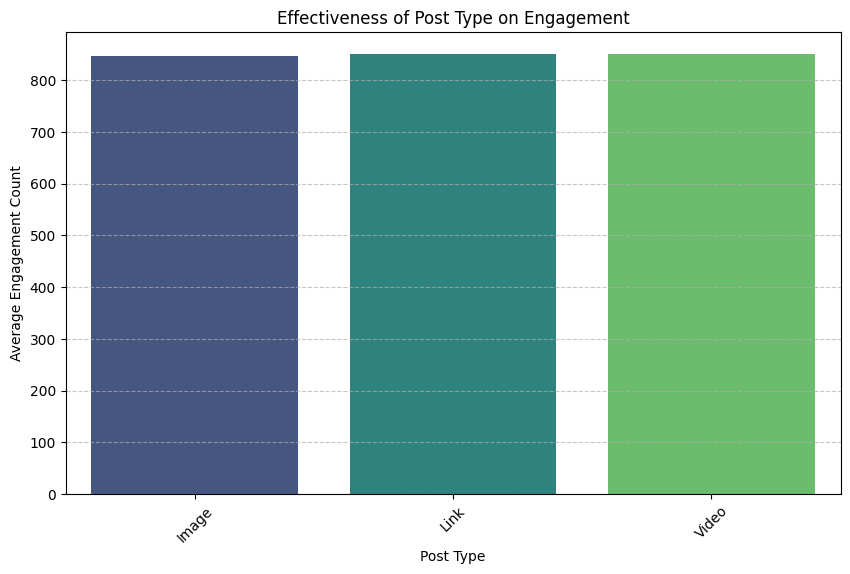

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Create Engagement Count column (Likes + Comments + Shares)
df['Engagement Count'] = df['Likes'] + df['Comments'] + df['Shares']

# Group by Post Type and calculate average engagement
engagement_by_type = df.groupby('Post Type')['Engagement Count'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Post Type', y='Engagement Count', data=engagement_by_type, palette='viridis')
plt.xlabel('Post Type')
plt.ylabel('Average Engagement Count')
plt.title('Effectiveness of Post Type on Engagement')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


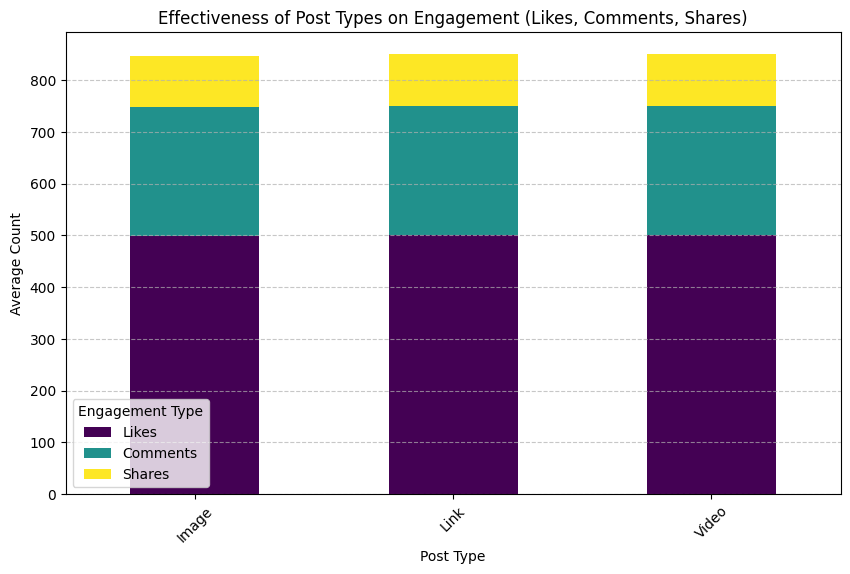

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Group by Post Type and sum Likes, Comments, and Shares
engagement_by_type = df.groupby('Post Type')[['Likes', 'Comments', 'Shares']].mean()

# Plot a stacked bar chart
engagement_by_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the chart
plt.xlabel('Post Type')
plt.ylabel('Average Count')
plt.title('Effectiveness of Post Types on Engagement (Likes, Comments, Shares)')
plt.xticks(rotation=45)
plt.legend(title="Engagement Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


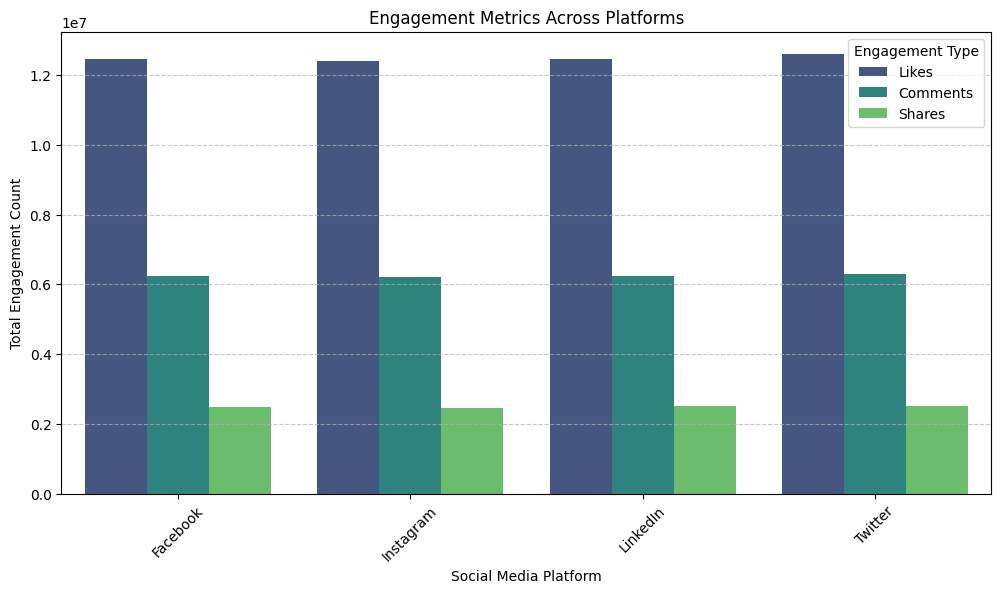

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Group by Platform and sum Likes, Comments, and Shares
engagement_by_platform = df.groupby('Platform')[['Likes', 'Comments', 'Shares']].sum().reset_index()

# Melt the dataframe to long format for better visualization
engagement_melted = engagement_by_platform.melt(id_vars='Platform',
                                                 var_name='Engagement Type',
                                                 value_name='Count')

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Count', hue='Engagement Type', data=engagement_melted, palette='viridis')

# Customizing the chart
plt.xlabel('Social Media Platform')
plt.ylabel('Total Engagement Count')
plt.title('Engagement Metrics Across Platforms')
plt.xticks(rotation=45)
plt.legend(title="Engagement Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


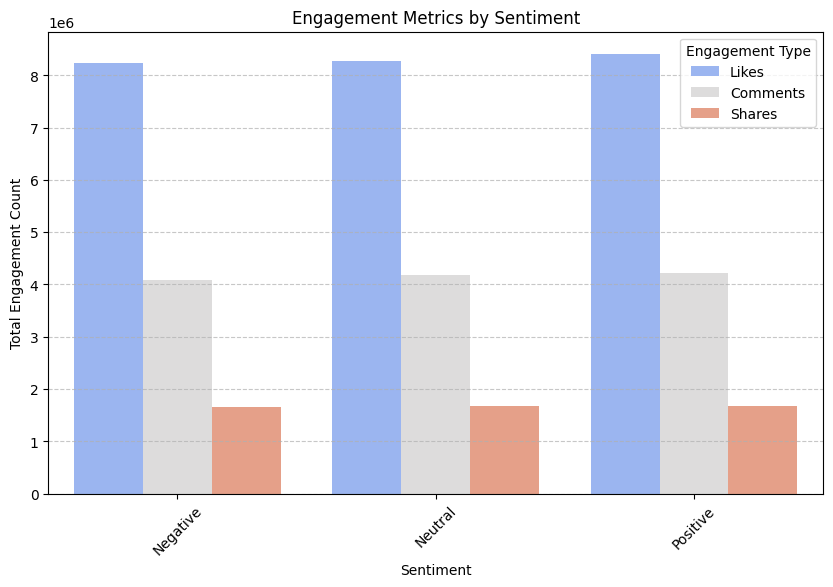

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Group by Sentiment and sum Likes, Comments, and Shares
engagement_by_sentiment = df.groupby('Sentiment')[['Likes', 'Comments', 'Shares']].sum().reset_index()

# Melt the dataframe to long format for better visualization
engagement_melted = engagement_by_sentiment.melt(id_vars='Sentiment',
                                                 var_name='Engagement Type',
                                                 value_name='Count')

# Plot a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Count', hue='Engagement Type', data=engagement_melted, palette='coolwarm')

# Customizing the chart
plt.xlabel('Sentiment')
plt.ylabel('Total Engagement Count')
plt.title('Engagement Metrics by Sentiment')
plt.xticks(rotation=45)
plt.legend(title="Engagement Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Group data by audience location and calculate total Likes, Comments, and Shares
engagement_by_location = df.groupby('Audience Location')[['Likes', 'Comments', 'Shares']].sum().reset_index()

# Define which engagement metric to visualize (Choose: 'Likes', 'Comments', or 'Shares')
metric = 'Likes'  # Change to 'Comments' or 'Shares' if needed

# Calculate maximum number of the selected metric to define custom color scale
max_metric = engagement_by_location[metric].max()

# Define custom color scale
color_scale = [(i/max_metric, px.colors.sequential.Plasma[i%10]) for i in range(0, max_metric+1, max(25000, max_metric//10))]

# Create a choropleth map
fig = px.choropleth(
    engagement_by_location,
    locations='Audience Location',
    locationmode='country names',
    color=metric,
    hover_name='Audience Location',
    color_continuous_scale=color_scale,
    title=f'Engagement Levels Across Different Regions ({metric})'
)

# Show the figure
fig.show()


<ipython-input-13-c2486987cb55>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




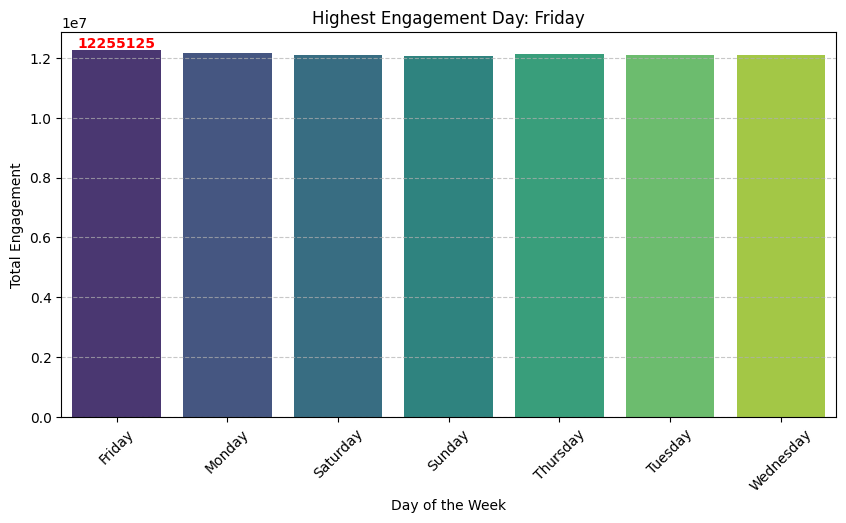

Highest Engagement Day: Friday
Total Engagement: 12255125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Convert 'Post Timestamp' column to datetime format
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')

# Drop rows where 'Post Timestamp' conversion failed
df = df.dropna(subset=['Post Timestamp'])

# Extract day name and create a new column 'Day'
df['Day'] = df['Post Timestamp'].dt.day_name()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares']] = df[['Likes', 'Comments', 'Shares']].apply(pd.to_numeric, errors='coerce')

# Group by 'Day' and sum Likes, Comments, and Shares
engagement_by_day = df.groupby('Day')[['Likes', 'Comments', 'Shares']].sum().reset_index()

# Calculate total engagement (Likes + Comments + Shares)
engagement_by_day['Total Engagement'] = engagement_by_day[['Likes', 'Comments', 'Shares']].sum(axis=1)

# Find the day with the highest engagement
highest_engagement_day = engagement_by_day.loc[engagement_by_day['Total Engagement'].idxmax()]

# Plot the engagement for all days with a special highlight for the highest engagement day
plt.figure(figsize=(10, 5))
sns.barplot(x='Day', y='Total Engagement', data=engagement_by_day, palette='viridis')

# Highlight the highest engagement day
plt.text(highest_engagement_day.name, highest_engagement_day['Total Engagement'],
         f'{highest_engagement_day["Total Engagement"]}',
         ha='center', va='bottom', color='red', fontweight='bold')

# Customize the chart
plt.xlabel('Day of the Week')
plt.ylabel('Total Engagement')
plt.title(f'Highest Engagement Day: {highest_engagement_day["Day"]}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Output the highest engagement day details
print(f"Highest Engagement Day: {highest_engagement_day['Day']}")
print(f"Total Engagement: {highest_engagement_day['Total Engagement']}")


<ipython-input-14-3a901834fe50>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




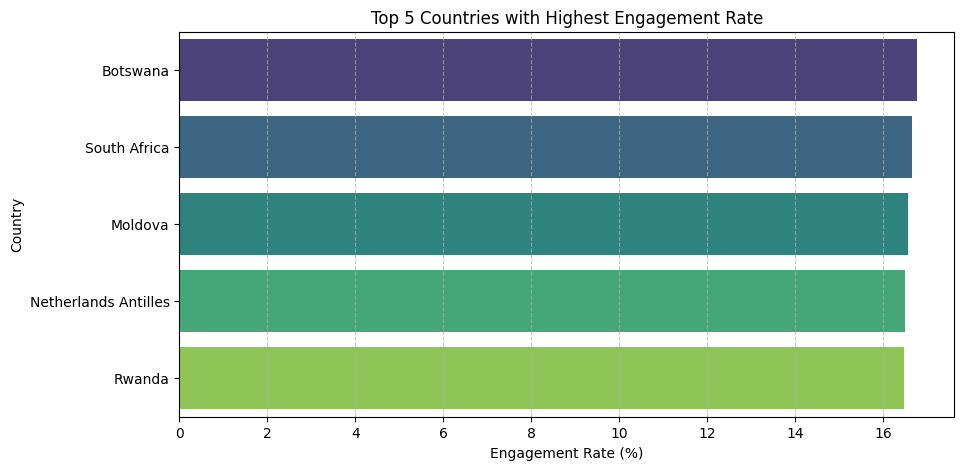

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares', 'Impressions']] = df[['Likes', 'Comments', 'Shares', 'Impressions']].apply(pd.to_numeric, errors='coerce')

# Group by 'Audience Location' (Country) and sum Likes, Comments, Shares, and Impressions
engagement_by_country = df.groupby('Audience Location')[['Likes', 'Comments', 'Shares', 'Impressions']].sum().reset_index()

# Calculate engagement rate for each country (Engagement Rate = Total Engagement / Impressions)
engagement_by_country['Total Engagement'] = engagement_by_country[['Likes', 'Comments', 'Shares']].sum(axis=1)
engagement_by_country['Engagement Rate'] = engagement_by_country['Total Engagement'] / engagement_by_country['Impressions'] * 100

# Sort the countries by Engagement Rate in descending order and get top 5
top_5_countries = engagement_by_country.sort_values('Engagement Rate', ascending=False).head(5)

# Plot the engagement rate for the top 5 countries
plt.figure(figsize=(10, 5))
sns.barplot(x='Engagement Rate', y='Audience Location', data=top_5_countries, palette='viridis')

# Customize the chart
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Engagement Rate')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


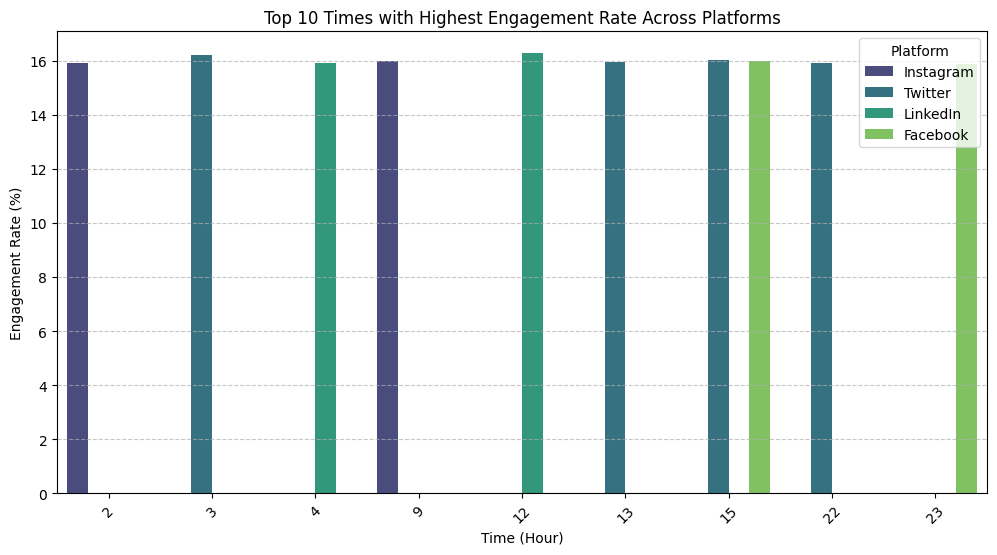

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares', 'Impressions']] = df[['Likes', 'Comments', 'Shares', 'Impressions']].apply(pd.to_numeric, errors='coerce')

# Convert 'Time stamp' to datetime format if needed
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')

# Extract hour in 24-hour format from 'Post Timestamp' column
df['Hour'] = df['Post Timestamp'].dt.hour

# Group by 'Hour' and 'Platform', and sum Likes, Comments, Shares, and Impressions
engagement_by_time_platform = df.groupby(['Hour', 'Platform'])[['Likes', 'Comments', 'Shares', 'Impressions']].sum().reset_index()

# Calculate engagement rate (Engagement Rate = Total Engagement / Impressions)
engagement_by_time_platform['Total Engagement'] = engagement_by_time_platform[['Likes', 'Comments', 'Shares']].sum(axis=1)
engagement_by_time_platform['Engagement Rate'] = engagement_by_time_platform['Total Engagement'] / engagement_by_time_platform['Impressions'] * 100

# Sort by Engagement Rate in descending order and get top 10
top_10_times = engagement_by_time_platform.sort_values('Engagement Rate', ascending=False).head(10)

# Plot the top 10 times with the highest engagement rate across platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Engagement Rate', hue='Platform', data=top_10_times, palette='viridis')

# Customize the chart
plt.xlabel('Time (Hour)')
plt.ylabel('Engagement Rate (%)')
plt.title('Top 10 Times with Highest Engagement Rate Across Platforms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


ValueError: array length 9 does not match index length 10

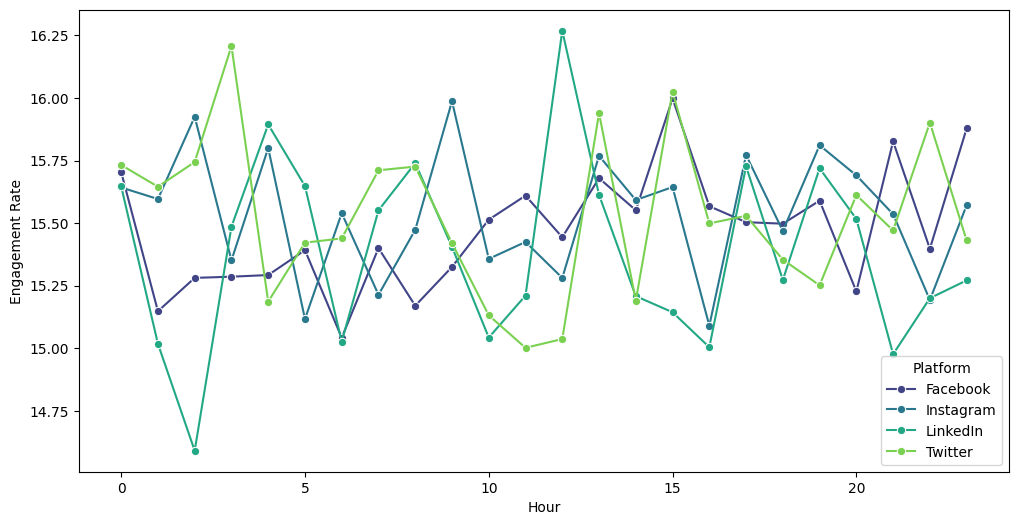

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares', 'Impressions']] = df[['Likes', 'Comments', 'Shares', 'Impressions']].apply(pd.to_numeric, errors='coerce')

# Convert 'Post Timestamp' to datetime format if needed
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')

# Extract hour in 24-hour format from 'Post Timestamp' column
df['Hour'] = df['Post Timestamp'].dt.hour

# Group by 'Hour' and 'Platform', and sum Likes, Comments, Shares, and Impressions
engagement_by_time_platform = df.groupby(['Hour', 'Platform'])[['Likes', 'Comments', 'Shares', 'Impressions']].sum().reset_index()

# Calculate engagement rate (Engagement Rate = Total Engagement / Impressions)
engagement_by_time_platform['Total Engagement'] = engagement_by_time_platform[['Likes', 'Comments', 'Shares']].sum(axis=1)
engagement_by_time_platform['Engagement Rate'] = engagement_by_time_platform['Total Engagement'] / engagement_by_time_platform['Impressions'] * 100

# Sort by Engagement Rate in descending order and get top 10
top_10_times = engagement_by_time_platform.sort_values('Engagement Rate', ascending=False).head(10)

# Create line plot for engagement rate across hours for different platforms
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Engagement Rate', hue='Platform', data=engagement_by_time_platform, marker='o', palette='viridis')

# Highlight the top peak hours by plotting them separately
top_peak_hours = top_10_times['Hour'].unique()
sns.scatterplot(x=top_peak_hours, y=top_10_times['Engagement Rate'], color='red', s=100, label='Top Peak Hours')

# Label the data points
for i in range(len(top_10_times)):
    plt.text(top_10_times['Hour'].iloc[i], top_10_times['Engagement Rate'].iloc[i] + 0.5,
             f"{top_10_times['Hour'].iloc[i]}h", ha='center', fontsize=10, color='black')

# Customize the chart
plt.xlabel('Time (Hour)')
plt.ylabel('Engagement Rate (%)')
plt.title('Top 10 Times with Highest Engagement Rate Across Platforms')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.legend(title='Platforms', loc='upper left')
plt.show()


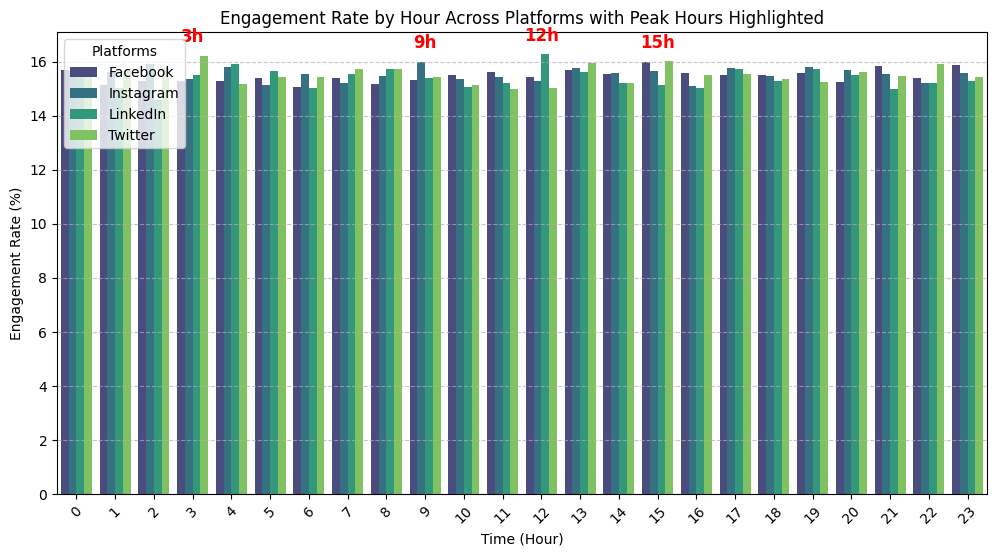

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares', 'Impressions']] = df[['Likes', 'Comments', 'Shares', 'Impressions']].apply(pd.to_numeric, errors='coerce')

# Convert 'Post Timestamp' to datetime format if needed
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')

# Extract hour in 24-hour format from 'Post Timestamp' column
df['Hour'] = df['Post Timestamp'].dt.hour

# Group by 'Hour' and 'Platform', and sum Likes, Comments, Shares, and Impressions
engagement_by_time_platform = df.groupby(['Hour', 'Platform'])[['Likes', 'Comments', 'Shares', 'Impressions']].sum().reset_index()

# Calculate engagement rate (Engagement Rate = Total Engagement / Impressions)
engagement_by_time_platform['Total Engagement'] = engagement_by_time_platform[['Likes', 'Comments', 'Shares']].sum(axis=1)
engagement_by_time_platform['Engagement Rate'] = engagement_by_time_platform['Total Engagement'] / engagement_by_time_platform['Impressions'] * 100

# Find the peak hour for each platform
peak_hours = engagement_by_time_platform.loc[engagement_by_time_platform.groupby('Platform')['Engagement Rate'].idxmax()]

# Plot the bar chart for engagement rates across different times and platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Engagement Rate', hue='Platform', data=engagement_by_time_platform, palette='viridis')

# Highlight the most peak hour for each platform
for i in range(len(peak_hours)):
    plt.text(peak_hours['Hour'].iloc[i], peak_hours['Engagement Rate'].iloc[i] + 0.5,
             f"{peak_hours['Hour'].iloc[i]}h", ha='center', fontsize=12, color='red', fontweight='bold')

# Customize the chart
plt.xlabel('Time (Hour)')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Hour Across Platforms with Peak Hours Highlighted')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.legend(title='Platforms', loc='upper left')
plt.show()


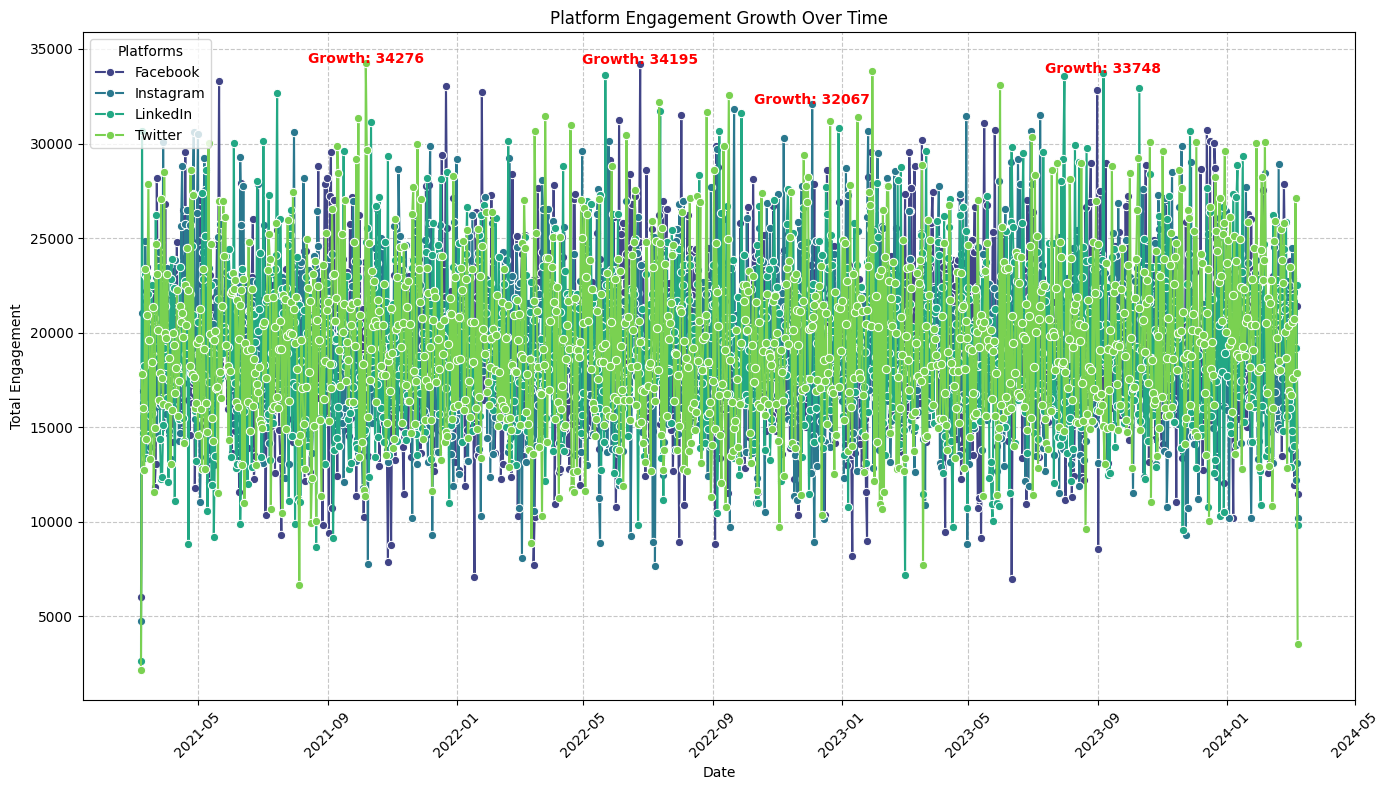

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/social_media_engagement_data.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Ensure engagement metrics are numeric
df[['Likes', 'Comments', 'Shares', 'Impressions']] = df[['Likes', 'Comments', 'Shares', 'Impressions']].apply(pd.to_numeric, errors='coerce')

# Convert 'Post Timestamp' to datetime format if needed
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')

# Extract date (for time series analysis by day) and platform
df['Date'] = df['Post Timestamp'].dt.date

# Calculate total engagement per platform and date (Likes + Comments + Shares)
df['Total Engagement'] = df[['Likes', 'Comments', 'Shares']].sum(axis=1)
engagement_by_day_platform = df.groupby(['Date', 'Platform'])['Total Engagement'].sum().reset_index()

# Create a line plot for engagement growth over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Total Engagement', hue='Platform', data=engagement_by_day_platform, marker='o', palette='viridis')

# Identify the point of highest growth for each platform
growth_points = engagement_by_day_platform.loc[engagement_by_day_platform.groupby('Platform')['Total Engagement'].idxmax()]

# Highlight the highest growth points for each platform
for i in range(len(growth_points)):
    plt.text(growth_points['Date'].iloc[i], growth_points['Total Engagement'].iloc[i] + 0.1,
             f"Growth: {growth_points['Total Engagement'].iloc[i]}", ha='center', fontsize=10, color='red', fontweight='bold')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.title('Platform Engagement Growth Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.legend(title='Platforms', loc='upper left')
plt.tight_layout()
plt.show()
